In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [21]:
data_path0 = "../../data_3eig/02_processed/02_npt/prod_0/"
data_path1 = "../../data_3eig/02_processed/02_npt/prod_1/"
data_path2 = "../../data_3eig/02_processed/02_npt/prod_2/"

In [22]:
os.system("cat " + data_path0 + "00_prod0_header.txt")

# This file was created Fri Dec  6 11:38:39 2024
# Created by:
#                      :-) GROMACS - gmx energy, 2021.4 (-:
# 
# Executable:   /usr/local/gromacs/bin/gmx
# Data prefix:  /usr/local/gromacs
# Working dir:  /home/giacomo/comp_bio/cbp_final/data_3eig/01_raw/02_NPT/00_npt_0
# Command line:
#   gmx energy -f step5_prod_0.edr -o 00_prod0.xvg
# gmx energy is part of G R O M A C S:
#
# Getting the Right Output Means no Artefacts in Calculating Stuff
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K), (bar), (), (kg/m^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
@ s1 legend "Pressure"
@ s2 legend "Constr. rmsd"
@ s3 legend "Density"


0

In [25]:
tem_df0 = pd.read_csv(data_path0 + "00_prod0.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df1 = pd.read_csv(data_path1 + "01_prod1.xvg", header = None, sep = " ", skipinitialspace=True)
tem_df2 = pd.read_csv(data_path2 + "02_prod2.xvg", header = None, sep = " ", skipinitialspace=True)

In [26]:
# row0 = len(tem_df0)-1
# adj_term = tem_df0[0].iloc[-1] + 2
# tem_df1[0] = tem_df1[0] + adj_term

In [28]:
# concatenate 2 df
tem_df = pd.concat([tem_df0, tem_df1, tem_df2])
# Note - this solution is less general, as it assumes that the time step is 2 (ps), but is easier 
# to concatenate many dfs. 
# - GM
tem_df[0] = 2 * np.arange(len(tem_df))

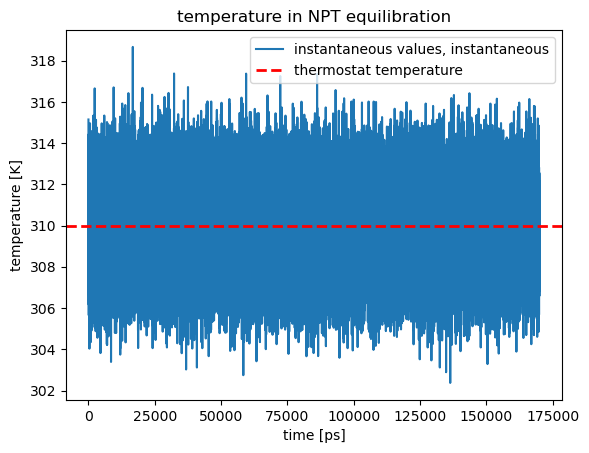

In [36]:
plt.plot(tem_df[0], tem_df[1], label = "instantaneous values, instantaneous")
# plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
plt.title("temperature in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

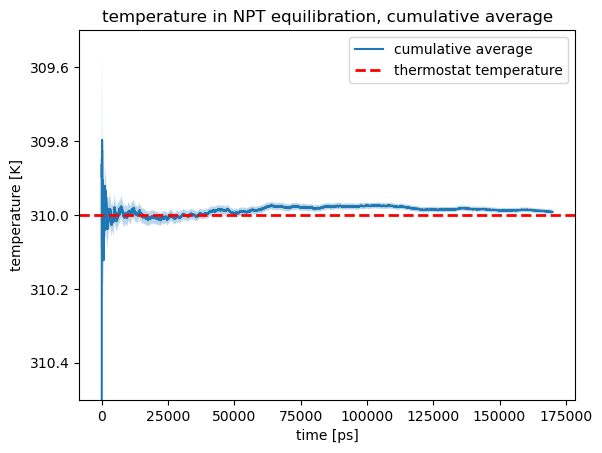

In [37]:
# plt.plot(tem_df[0], tem_df[1], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[1].expanding().var() / tem_df[1].expanding().count())
plt.fill_between(tem_df[0], tem_df[1].expanding().mean() + errors, tem_df[1].expanding().mean() - errors, alpha=0.3)
plt.title("temperature in NPT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.ylim(310.5, 309.5)
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

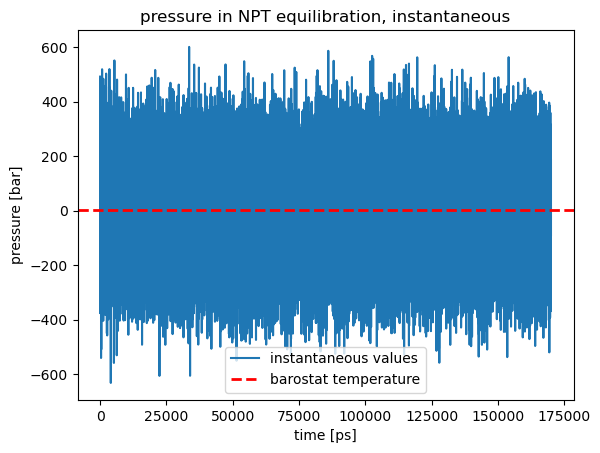

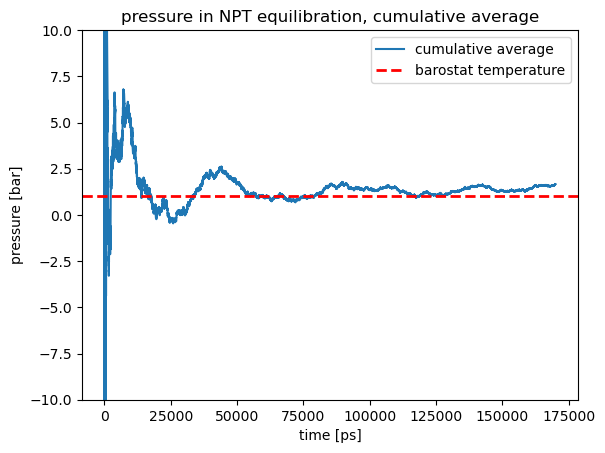

In [38]:
plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
# plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
plt.title("pressure in NPT equilibration, instantaneous")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
#errors = np.sqrt(tem_df[2].expanding().var() / tem_df[2].expanding().count())
#plt.fill_between(tem_df[0], tem_df[2].expanding().mean() + errors, tem_df[2].expanding().mean() - errors, alpha=0.3)
plt.title("pressure in NPT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.ylim(-10,10)
plt.show()

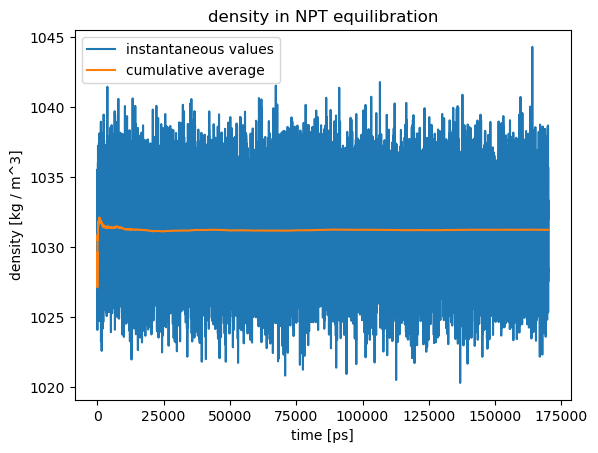

In [39]:
plt.plot(tem_df[0], tem_df[4], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[4].expanding().mean(), label = "cumulative average")
plt.title("density in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("density [kg / m^3]")
# plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()